In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [6]:
#import data sets
train_data = pd.read_csv('TRAINDATAnewcols7.16_3year.csv')
test_data = pd.read_csv('TESTDATAnewcols7.16_3year.csv')

In [5]:
train_data

,RegionName,City,State,Rent,total_pop,median_age,median_income,million_dollar_housing_units,dwellings_50_or_more_units,mobile_homes,...,Perc_commuter_by_public_transport,Perc_worked_at_home,Perc_different_house_year_ago_same_city,Perc_different_house_year_ago_dif_city,perc_housing_built_2005_or_later,ESTAB,HIFL_hospital_count,HIFL_transit_station_count,HIFL_uni,HIFL_govbldg
0,77084-2016-09,Houston,TX,1332.0,98697.0,31.3,62248.0,15.0,1009.0,41.0,...,0.012828,0.034065,0.014043,0.145952,0.005121,1503.0,0.0,0.0,2.0,0.0
1,92651-2016-09,Laguna Beach,CA,2569.0,23636.0,49.5,96339.0,4817.0,315.0,232.0,...,0.012033,0.110448,0.032916,0.098705,0.007678,1164.0,0.0,0.0,1.0,0.0
2,33150-2016-09,Miami,FL,1721.0,27929.0,33.0,25787.0,10.0,534.0,685.0,...,0.151402,0.012876,0.045043,0.060188,0.011356,355.0,1.0,0.0,0.0,0.0
3,63109-2016-09,Saint Louis,MO,749.0,27255.0,37.4,51759.0,0.0,62.0,0.0,...,0.028441,0.037022,0.091726,0.068758,0.000000,518.0,0.0,0.0,0.0,0.0
4,78257-2016-09,San Antonio,TX,1252.0,3779.0,41.9,115417.0,193.0,34.0,220.0,...,0.018663,0.098404,0.055041,0.157184,0.037879,318.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,10036-2016-09,New York,NY,3530.0,22413.0,38.8,64013.0,390.0,10241.0,14.0,...,0.481614,0.056953,0.121938,0.078080,0.005406,6118.0,1.0,4.0,1.0,0.0
2083,10458-2017-09,New York,NY,1642.0,74859.0,29.2,24618.0,21.0,9969.0,14.0,...,0.640839,0.033585,0.103662,0.020786,0.002312,1058.0,0.0,3.0,1.0,0.0
2084,95112-2016-09,San Jose,CA,2529.0,53268.0,30.8,48070.0,244.0,3255.0,934.0,...,0.087066,0.038964,0.150259,0.097244,0.001388,2139.0,0.0,2.0,0.0,0.0
2085,1854-2016-09,Lowell,MA,1997.0,28113.0,31.5,49306.0,0.0,1124.0,0.0,...,0.043768,0.021386,0.080781,0.090741,0.002896,299.0,2.0,0.0,1.0,0.0


In [7]:
#drop columns

train_data = train_data.drop(['RegionName', 'City', 'State'], axis=1)
test_data = test_data.drop(['RegionName', 'City', 'State'], axis=1)

In [8]:
train_data.shape

(2087, 51)

In [9]:
test_data.shape

(1029, 51)

In [10]:
X_train = train_data.drop(['Rent'],axis=1)
y_train = train_data['Rent']
X_test = test_data.drop(['Rent'],axis=1)
y_test = test_data['Rent']

In [11]:
X_train.shape

(2087, 50)

In [12]:
y_train.shape

(2087,)

In [13]:
X_test.shape

(1029, 50)

In [14]:
y_test.shape

(1029,)

In [15]:
# create RandomForest

rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)

print("The training error is : %.5f" % (1 - rf.score(X_train, y_train)))
print("The test error is: %.5f" % (1 - rf.score(X_test, y_test)))

The training error is : 0.05649
The test error is: 0.18698


In [16]:
# check CV score

cv_score = cross_val_score(rf, X_train, y_train, cv=5)
cv_score.mean()

0.6638578058071214

In [17]:
# create y prediction

y_pred = rf.predict(X_test)

In [18]:
# get r2 score
# get mse

print("The r2 score is : %.5f" % r2_score(y_test, y_pred))
print("The mse is : %.5f" % mean_squared_error(y_test, y_pred))
print("The mse sqrt is : %.5f" % (mean_squared_error(y_test, y_pred)**.5))

The r2 score is : 0.81302
The mse is : 89846.68393
The mse sqrt is : 299.74436


In [20]:
# create param for gridsearch

param_grid = ({
    'max_features': ['sqrt', .30, .35],
    'n_estimators': [650, 700, 750],
    'max_depth': [10, 12, 14]
})

In [21]:
# run grid search

rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, return_train_score = True)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 12, 14],
                         'max_features': ['sqrt', 0.3, 0.35],
                         'n_estimators': [650, 700, 750]},
             return_train_score=True)

In [22]:
# get best params

rf_grid.best_params_

{'max_depth': 14, 'max_features': 0.3, 'n_estimators': 650}

In [23]:
# create new randomForest model with new params
# (would normally just set_params but for reuse of notebook seems like a safer bet to create new)

rf2 = RandomForestRegressor(max_depth=14, max_features=0.3,
                            n_estimators=650, random_state=42)

rf2.fit(X_train, y_train)

print("The new training error is : %.5f" % (1 - rf2.score(X_train, y_train)))
print("The new test error is: %.5f" % (1 - rf2.score(X_test, y_test)))

The new training error is : 0.04199
The new test error is: 0.13960


In [24]:
# create new y predict

y_new_pred = rf2.predict(X_test)

In [25]:
# updated r2 score
# updated mse

print("The r2 score is : %.5f" % r2_score(y_test, y_pred))
print("The mse is : %.5f" % mean_squared_error(y_test, y_pred))
print("The mse sqrt is : %.5f" % (mean_squared_error(y_test, y_pred)**.5))

print("The new r2 score is : %.5f" % r2_score(y_test, y_new_pred))
print("The new mse is : %.5f" % mean_squared_error(y_test, y_new_pred))
print("The new mse sqrt is : %.5f" % (mean_squared_error(y_test, y_new_pred)**.5))

The r2 score is : 0.81302
The mse is : 89846.68393
The mse sqrt is : 299.74436
The new r2 score is : 0.86040
The new mse is : 67077.06641
The new mse sqrt is : 258.99241


In [40]:
importance = rf2.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00442
Feature: 1, Score: 0.00795
Feature: 2, Score: 0.03622
Feature: 3, Score: 0.13248
Feature: 4, Score: 0.02675
Feature: 5, Score: 0.04301
Feature: 6, Score: 0.01419
Feature: 7, Score: 0.00520
Feature: 8, Score: 0.00456
Feature: 9, Score: 0.00660
Feature: 10, Score: 0.01317
Feature: 11, Score: 0.00806
Feature: 12, Score: 0.01687
Feature: 13, Score: 0.00813
Feature: 14, Score: 0.00685
Feature: 15, Score: 0.02027
Feature: 16, Score: 0.02694
Feature: 17, Score: 0.00967
Feature: 18, Score: 0.01139
Feature: 19, Score: 0.00532
Feature: 20, Score: 0.00650
Feature: 21, Score: 0.00722
Feature: 22, Score: 0.01157
Feature: 23, Score: 0.02565
Feature: 24, Score: 0.00655
Feature: 25, Score: 0.03907
Feature: 26, Score: 0.00880
Feature: 27, Score: 0.01149
Feature: 28, Score: 0.03915
Feature: 29, Score: 0.02069
Feature: 30, Score: 0.07545
Feature: 31, Score: 0.00951
Feature: 32, Score: 0.01683
Feature: 33, Score: 0.02213
Feature: 34, Score: 0.01619
Feature: 35, Score: 0.02459
Fe

In [49]:
X_train.iloc[:,3]

0         15.0
1       4817.0
2         10.0
3          0.0
4        193.0
         ...  
2082     390.0
2083      21.0
2084     244.0
2085       0.0
2086       0.0
Name: million_dollar_housing_units, Length: 2087, dtype: float64

In [50]:
X_train.iloc[:,30]

0       0.257361
1       0.158518
2       0.170030
3       0.076491
4       0.127032
          ...   
2082    0.124936
2083    0.487290
2084    0.120848
2085    0.183610
2086    0.098684
Name: Perc_commuters_over_45_min, Length: 2087, dtype: float64

In [51]:
X_train.iloc[:,40]

0       0.012828
1       0.012033
2       0.151402
3       0.028441
4       0.018663
          ...   
2082    0.481614
2083    0.640839
2084    0.087066
2085    0.043768
2086    0.057018
Name: Perc_commuter_by_public_transport, Length: 2087, dtype: float64

Text(0.5, 0, 'Relative Imprtance')

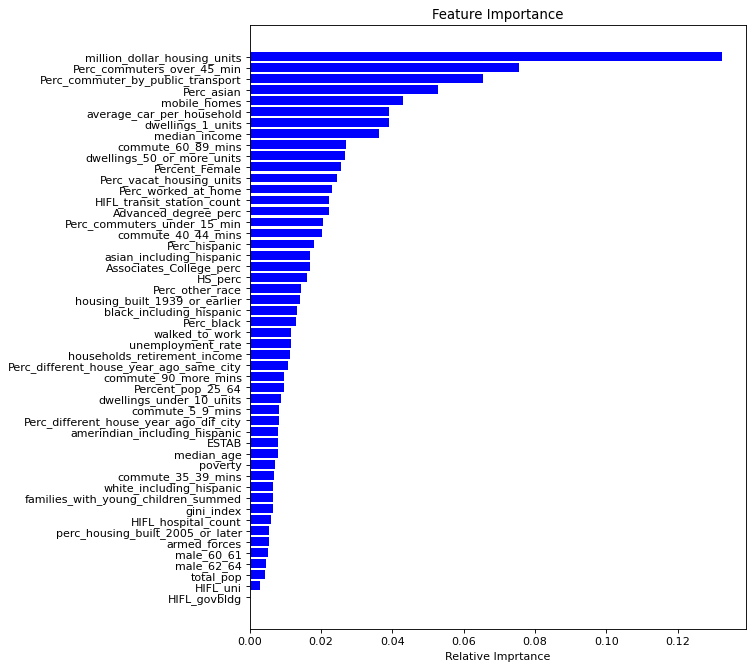

In [66]:
features = X_train.columns
indices = np.argsort(importance)

plt.figure(1, figsize=(8, 10), dpi=80)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Imprtance')